In [14]:
import numpy as np
from BALinFit.bayes_linfit import bayesian_regression_mcmc

import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('test.csv', names=['id', 'x', 'xerrl', 'xerru', 'y', 'yerrl', 'yerru'], header=0)
df = df = df[~df['x'].isna() & (df['x'] != -np.inf)]

In [16]:
df

,id,x,xerrl,xerru,y,yerrl,yerru
0,1,-1.284693,0.176102,0.216866,1.644104,0.193874,0.231135
2,3,-0.810841,0.202710,0.194648,1.707728,0.192076,0.213778
4,5,-0.321727,0.178127,0.184521,1.717245,0.099932,0.110270
5,6,-0.690510,0.281219,0.180548,1.786965,0.147592,0.672152
6,7,-0.170246,0.185447,0.223091,1.952145,0.255089,0.364265
7,8,-0.444281,0.176657,0.191723,1.708126,0.123847,0.139456
8,9,-1.458283,0.179785,0.179486,1.604787,0.102782,0.111156
9,10,-0.259773,0.176361,0.179733,1.719006,0.068193,0.082332
11,12,-0.893923,0.182282,0.206601,1.880820,0.203829,0.305401
12,13,-0.256131,0.201143,0.177858,1.864040,0.128695,0.152877


In [17]:
results = bayesian_regression_mcmc(
    x=df['x'].values, 
    y=df['y'].values, 
    y_err_lower=df['yerrl'].values/1.645, 
    y_err_upper=df['yerru'].values/1.645,
    x_err_lower=df['xerrl'].values/1.645, 
    x_err_upper=df['xerru'].values/1.645,
    x_min=-2, x_max=0.5,
    num_realizations=100
)
results

Running MCMC realizations:   0%|          | 0/100 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/xpecax/Software/BALinFit/BALinFit/bayes_linfit.py", line 42, in log_probability
    lp = log_prior(theta)
         ^^^^^^^^^^^^^^^^
  File "/Users/xpecax/Software/BALinFit/BALinFit/bayes_linfit.py", line 34, in log_prior
    intercept, slope, sigma_int = theta
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: not enough values to unpack (expected 3, got 2)
Running MCMC realizations:   0%|          | 0/100 [00:00<?, ?it/s]

emcee: Exception while calling your likelihood function:
  params: [-1.20267236 -0.03505409]
  args: (array([-1.29094549, -0.86917713, -0.20612602, -0.74280647, -0.05518841,
       -0.47809029, -1.48401108, -0.08445671, -0.95465932, -0.40664677,
       -0.93022783, -0.40275016]), array([1.54971146, 1.73965566, 1.60588204, 1.8996453 , 2.32322327,
       1.70039147, 1.60458654, 1.63731467, 2.11935831, 1.85844319,
       1.85836688, 1.86407425]))
  kwargs: {}
  exception:


ValueError: not enough values to unpack (expected 3, got 2)

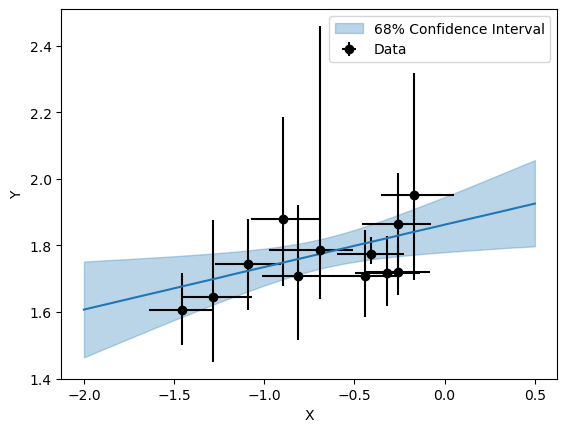

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(df['x'].values, df['y'].values, yerr=[df['yerrl'].values, df['yerru'].values], xerr=[df['xerrl'].values, df['xerru'].values], fmt='o', label='Data', color='black')
ax.plot(results['x_plot'], results['y_median'], color='tab:blue')#, label=f'Best Fit: y = {results['slope_median']:.2f} ± {results['slope_err_lower']:.2f}/{results['slope_err_upper']:.2f} x + {results['intercept_median']:.2f} ± {results['intercept_err_lower']:.2f}/{results['intercept_err_upper']:.2f}')
ax.fill_between(results['x_plot'], results['y_lower'], results['y_upper'], color='tab:blue', alpha=0.3, label='68% Confidence Interval')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()